<a href="https://colab.research.google.com/github/ramjv/scratch_assay_using_scikit_image/blob/master/scratch_assay_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

time= 0 hr   Scratch area= 33426 pix²
time= 1 hr   Scratch area= 27683 pix²
time= 2 hr   Scratch area= 24106 pix²
time= 3 hr   Scratch area= 21123 pix²
time= 4 hr   Scratch area= 18481 pix²
time= 5 hr   Scratch area= 16105 pix²
time= 6 hr   Scratch area= 14417 pix²
time= 7 hr   Scratch area= 12717 pix²
time= 8 hr   Scratch area= 10957 pix²
time= 9 hr   Scratch area= 9337 pix²
y =  -2504.9818181818187 x  +  30107.618181818187
R² =  0.9568904267126049


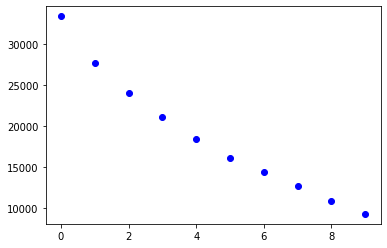

In [3]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np
from skimage.filters import threshold_otsu

import glob

time = 0
time_list=[]
area_list=[]
scratch_assay = ['Scratch0.jpg','Scratch1.jpg','Scratch2.jpg','Scratch3.jpg','Scratch4.jpg','Scratch5.jpg','Scratch6.jpg','Scratch7.jpg','Scratch8.jpg','Scratch9.jpg']
path = "/content/scratch_assay/"
for file in scratch_assay:
    dict={}
    img=io.imread(path+file)
    entropy_img = entropy(img, disk(3))
    thresh = threshold_otsu(entropy_img)
    binary = entropy_img <= thresh
    scratch_area = np.sum(binary == 1)
    print("time=", time, "hr  ", "Scratch area=", scratch_area, "pix\N{SUPERSCRIPT TWO}")
    time_list.append(time)
    area_list.append(scratch_area)
    time += 1

#print(time_list, area_list)
plt.plot(time_list, area_list, 'bo')  #Print blue dots scatter plot

#Print slope, intercept
from scipy.stats import linregress
#print(linregress(time_list, area_list))


slope, intercept, r_value, p_value, std_err = linregress(time_list, area_list)
print("y = ",slope, "x", " + ", intercept  )
print("R\N{SUPERSCRIPT TWO} = ", r_value**2)
#print("r-squared: %f" % r_value**2)